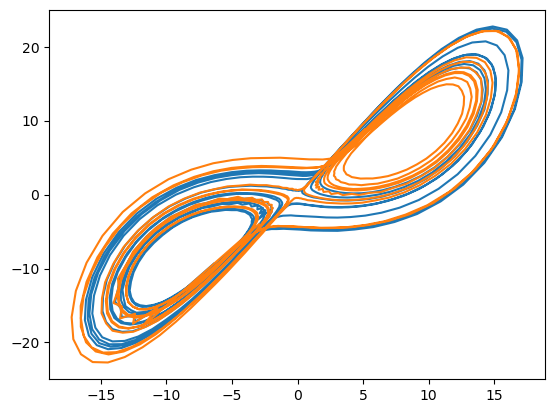

In [1]:
import matplotlib.pyplot as plt
import numpy as np

%load_ext autoreload
%autoreload 2
from dysts.flows import Lorenz, Hadley

## Load and simulate an attractor
model = Lorenz()
sol = model.make_trajectory(1000, resample=True,noise=0.01)
plt.figure()
plt.plot(sol[:, 0], sol[:, 1])

sol2 = model.make_trajectory(1000, resample=True,noise=0.01)

plt.plot(sol2[:, 0], sol2[:, 1])

Let's build some minimal models of transformer self-attention, mamba, and s4d and apply them to this data (for now, untrained)

In [2]:
import sys
import torch
sys.path.append("/om2/user/ostrow/NN_delay_embeddings/nn_delay_embeddings")
from models.transformers import minimalGPT

In [3]:
model = minimalGPT(1,100,1,1000)

In [4]:
data = torch.tensor(sol[np.newaxis,:,0:1]).float()
print(data.size())
out,hidden = model(data)
hidden = hidden.detach().numpy().squeeze()
out.shape,hidden.shape

torch.Size([1, 1000, 1])


(torch.Size([1, 1000, 1]), (1000, 100))

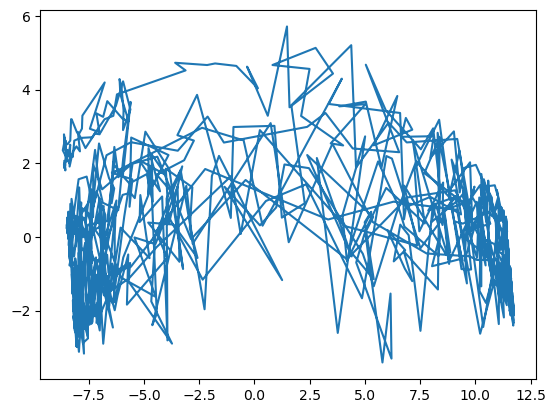

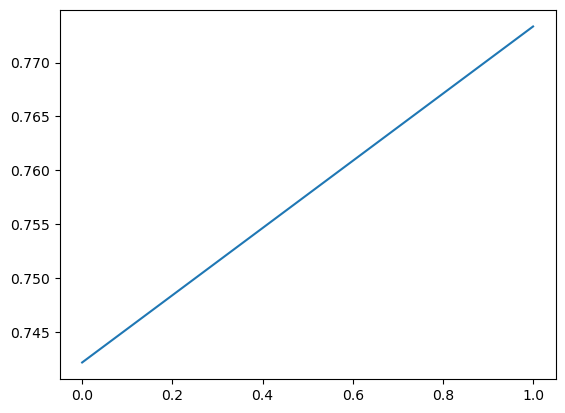

In [5]:
#run pca on the hidden states
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(hidden)
hidden_pca = pca.transform(hidden)
plt.figure()
plt.plot(hidden_pca[:,0],hidden_pca[:,1])
plt.figure()
#plot evr
plt.plot(np.cumsum(pca.explained_variance_ratio_))

Cool -- so this shows that an untrained transformer, although it receives a delay embedding, does not actually (at initialization) reconstruct the attractor

(20, 1000, 3) torch.Size([20, 1000, 1])
(20, 1000, 3) torch.Size([20, 1000, 1])


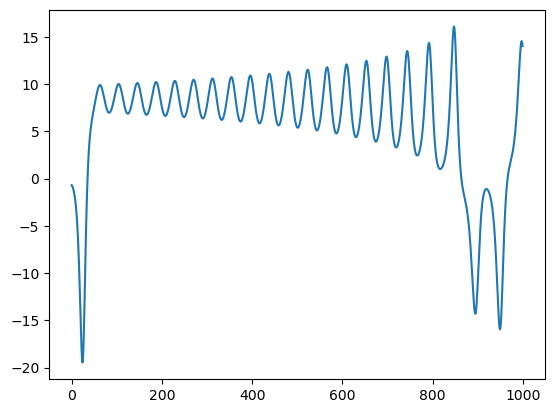

In [6]:
#convert these into dataloaders
from utils import make_dataset

train_loader, val_loader, train_data, val_data = make_dataset(Lorenz,1000,20)
plt.figure()
plt.plot(train_data[0,:1000,0])

  0%|          | 0/50 [00:00<?, ?it/s]

Epoch 0 Training Loss: 22.989840817451476


  2%|▏         | 1/50 [00:01<01:22,  1.69s/it]

Epoch 0 Validation Loss: 13.110815334320069
Epoch 1 Training Loss: 8.388858771324157


  4%|▍         | 2/50 [00:02<00:54,  1.14s/it]

Epoch 1 Validation Loss: 6.689684224128723
Epoch 2 Training Loss: 4.300155365467072


  6%|▌         | 3/50 [00:03<00:44,  1.06it/s]

Epoch 2 Validation Loss: 2.7316741943359375
Epoch 3 Training Loss: 2.760126620531082


  8%|▊         | 4/50 [00:03<00:39,  1.16it/s]

Epoch 3 Validation Loss: 2.1597887754440306
Epoch 4 Training Loss: 1.826467251777649


 10%|█         | 5/50 [00:04<00:37,  1.19it/s]

Epoch 4 Validation Loss: 1.9998457431793213
Epoch 5 Training Loss: 1.5240946412086487


 12%|█▏        | 6/50 [00:05<00:33,  1.30it/s]

Epoch 5 Validation Loss: 1.72811216711998
Epoch 6 Training Loss: 1.2894737124443054


 14%|█▍        | 7/50 [00:05<00:30,  1.42it/s]

Epoch 6 Validation Loss: 1.1000387161970138


 16%|█▌        | 8/50 [00:06<00:27,  1.56it/s]

Epoch 7 Training Loss: 1.0635665148496627
Epoch 7 Validation Loss: 1.5176289141178132
Epoch 8 Training Loss: 1.0401391953229904


 18%|█▊        | 9/50 [00:07<00:29,  1.39it/s]

Epoch 8 Validation Loss: 1.0703430086374284
Epoch 9 Training Loss: 0.9288476526737213


 20%|██        | 10/50 [00:08<00:31,  1.28it/s]

Epoch 9 Validation Loss: 1.5449154257774353


 22%|██▏       | 11/50 [00:08<00:27,  1.44it/s]

Epoch 10 Training Loss: 1.1537008851766586
Epoch 10 Validation Loss: 1.1613731861114502
Epoch 11 Training Loss: 0.9125599518418313


 24%|██▍       | 12/50 [00:09<00:25,  1.52it/s]

Epoch 11 Validation Loss: 0.821491813659668


 26%|██▌       | 13/50 [00:09<00:22,  1.65it/s]

Epoch 12 Training Loss: 0.746848514676094
Epoch 12 Validation Loss: 0.6993750125169754


 28%|██▊       | 14/50 [00:10<00:21,  1.68it/s]

Epoch 13 Training Loss: 0.6315762743353843
Epoch 13 Validation Loss: 0.6981608837842941


 30%|███       | 15/50 [00:10<00:20,  1.73it/s]

Epoch 14 Training Loss: 0.5522499397397042
Epoch 14 Validation Loss: 0.6307388007640838
Epoch 15 Training Loss: 0.7677426546812057


 32%|███▏      | 16/50 [00:11<00:21,  1.59it/s]

Epoch 15 Validation Loss: 0.7432907044887542


 34%|███▍      | 17/50 [00:12<00:19,  1.68it/s]

Epoch 16 Training Loss: 0.5539368450641632
Epoch 16 Validation Loss: 0.6566505998373031


 36%|███▌      | 18/50 [00:12<00:18,  1.78it/s]

Epoch 17 Training Loss: 0.5496471434831619
Epoch 17 Validation Loss: 0.6131563276052475


 38%|███▊      | 19/50 [00:13<00:16,  1.88it/s]

Epoch 18 Training Loss: 0.7548522189259529
Epoch 18 Validation Loss: 0.6675783038139343


 40%|████      | 20/50 [00:13<00:15,  1.98it/s]

Epoch 19 Training Loss: 0.7208950892090797
Epoch 19 Validation Loss: 0.6489615440368652
Epoch 20 Training Loss: 0.661045840382576


 42%|████▏     | 21/50 [00:14<00:16,  1.76it/s]

Epoch 20 Validation Loss: 0.8652237862348556
Epoch 21 Training Loss: 0.658700542151928


 44%|████▍     | 22/50 [00:14<00:16,  1.65it/s]

Epoch 21 Validation Loss: 0.6562975764274597
Epoch 22 Training Loss: 0.5393971711397171


 46%|████▌     | 23/50 [00:15<00:17,  1.52it/s]

Epoch 22 Validation Loss: 0.6613200396299362
Epoch 23 Training Loss: 0.6521551579236984


 48%|████▊     | 24/50 [00:16<00:19,  1.36it/s]

Epoch 23 Validation Loss: 0.6371784150600434
Epoch 24 Training Loss: 0.5184281341731548


 50%|█████     | 25/50 [00:17<00:18,  1.34it/s]

Epoch 24 Validation Loss: 0.53242978900671
Epoch 25 Training Loss: 0.6572749443352223


 52%|█████▏    | 26/50 [00:18<00:18,  1.31it/s]

Epoch 25 Validation Loss: 0.656402912735939
Epoch 26 Training Loss: 1.0379749625921249


 54%|█████▍    | 27/50 [00:18<00:17,  1.33it/s]

Epoch 26 Validation Loss: 1.3065729111433029
Epoch 27 Training Loss: 1.8818642288446426


 56%|█████▌    | 28/50 [00:19<00:16,  1.34it/s]

Epoch 27 Validation Loss: 1.8383831560611725
Epoch 28 Training Loss: 1.119924846291542


 58%|█████▊    | 29/50 [00:20<00:15,  1.35it/s]

Epoch 28 Validation Loss: 0.7002559721469879
Epoch 29 Training Loss: 0.6424050405621529


 60%|██████    | 30/50 [00:21<00:14,  1.36it/s]

Epoch 29 Validation Loss: 0.7989800810813904


 62%|██████▏   | 31/50 [00:21<00:12,  1.48it/s]

Epoch 30 Training Loss: 0.4706919379532337
Epoch 30 Validation Loss: 0.6455139458179474


 64%|██████▍   | 32/50 [00:22<00:10,  1.64it/s]

Epoch 31 Training Loss: 0.4459599032998085
Epoch 31 Validation Loss: 0.47047574520111085
Epoch 32 Training Loss: 0.34277775287628176
Epoch 32 Validation Loss: 0.5097991600632668


 68%|██████▊   | 34/50 [00:23<00:08,  1.90it/s]

Epoch 33 Training Loss: 0.4519314169883728
Epoch 33 Validation Loss: 0.7574911177158355
Epoch 34 Training Loss: 0.6393111139535904


 70%|███████   | 35/50 [00:23<00:07,  1.94it/s]

Epoch 34 Validation Loss: 0.5732205435633659
Epoch 35 Training Loss: 0.4407667212188244


 72%|███████▏  | 36/50 [00:24<00:07,  1.77it/s]

Epoch 35 Validation Loss: 0.5845844015479088
Epoch 36 Training Loss: 0.6142058536410332


 74%|███████▍  | 37/50 [00:24<00:07,  1.63it/s]

Epoch 36 Validation Loss: 0.7364682704210281
Epoch 37 Training Loss: 0.6957168906927109


 76%|███████▌  | 38/50 [00:25<00:07,  1.58it/s]

Epoch 37 Validation Loss: 1.2768344342708589
Epoch 38 Training Loss: 0.8807788871228694


 78%|███████▊  | 39/50 [00:26<00:06,  1.61it/s]

Epoch 38 Validation Loss: 0.715147876739502
Epoch 39 Training Loss: 0.5796069964766503


 80%|████████  | 40/50 [00:26<00:06,  1.54it/s]

Epoch 39 Validation Loss: 0.5395500391721726
Epoch 40 Training Loss: 0.36802002117037774


 82%|████████▏ | 41/50 [00:27<00:05,  1.56it/s]

Epoch 40 Validation Loss: 0.446234130859375


 84%|████████▍ | 42/50 [00:28<00:04,  1.61it/s]

Epoch 41 Training Loss: 0.3338516436517239
Epoch 41 Validation Loss: 0.4695675656199455


 86%|████████▌ | 43/50 [00:28<00:03,  1.75it/s]

Epoch 42 Training Loss: 0.33912184089422226
Epoch 42 Validation Loss: 0.43580281883478167
Epoch 43 Training Loss: 0.31786095052957536


 88%|████████▊ | 44/50 [00:29<00:03,  1.68it/s]

Epoch 43 Validation Loss: 0.41199863851070406


 90%|█████████ | 45/50 [00:29<00:02,  1.72it/s]

Epoch 44 Training Loss: 0.3487819653004408
Epoch 44 Validation Loss: 0.4881050243973732


 92%|█████████▏| 46/50 [00:30<00:02,  1.80it/s]

Epoch 45 Training Loss: 0.314726635068655
Epoch 45 Validation Loss: 0.41785786002874375
Epoch 46 Training Loss: 0.31222451478242874


 94%|█████████▍| 47/50 [00:30<00:01,  1.70it/s]

Epoch 46 Validation Loss: 0.4091624766588211
Epoch 47 Training Loss: 0.2977248542010784


 96%|█████████▌| 48/50 [00:31<00:01,  1.57it/s]

Epoch 47 Validation Loss: 0.40090272277593614
Epoch 48 Training Loss: 0.2865859605371952


 98%|█████████▊| 49/50 [00:32<00:00,  1.42it/s]

Epoch 48 Validation Loss: 0.4028642579913139
Epoch 49 Training Loss: 0.28518540896475314


100%|██████████| 50/50 [00:33<00:00,  1.50it/s]

Epoch 49 Validation Loss: 0.4381465017795563


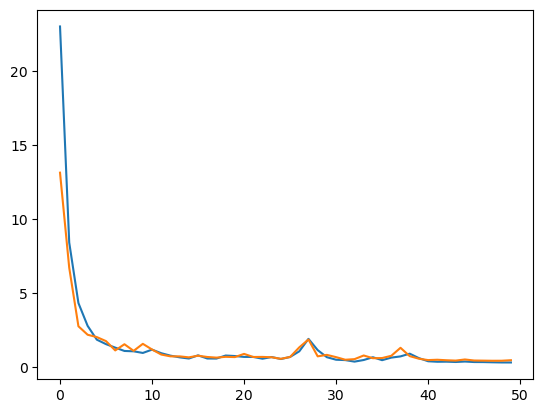

In [9]:
from utils import train
from torch.optim import AdamW
import torch.nn as nn
model = minimalGPT(1,100,10,1000)

#model,train_set,val_set,epochs,lr,optimizer,loss_fn,device
model, train_loss, val_loss = train(model, train_loader, val_loader, 50, 1e-3, AdamW, nn.MSELoss(), 'cuda')
plt.plot(train_loss)
plt.plot(val_loss)

/tmp/ipykernel_14227/2697761255.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  data = torch.tensor(data).float().cuda()


torch.Size([1, 1000, 1])
torch.Size([1, 1000, 1]) (1000, 100)


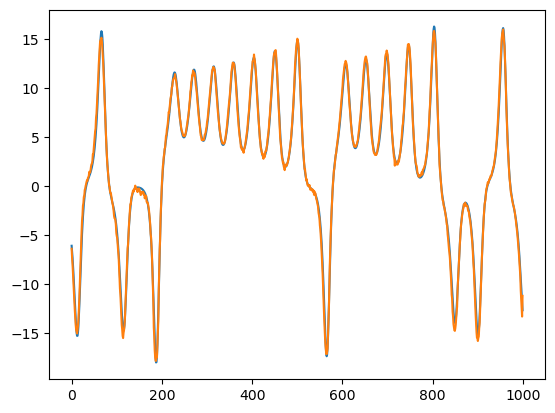

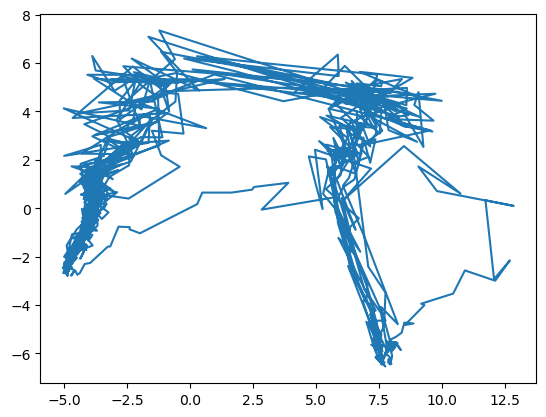

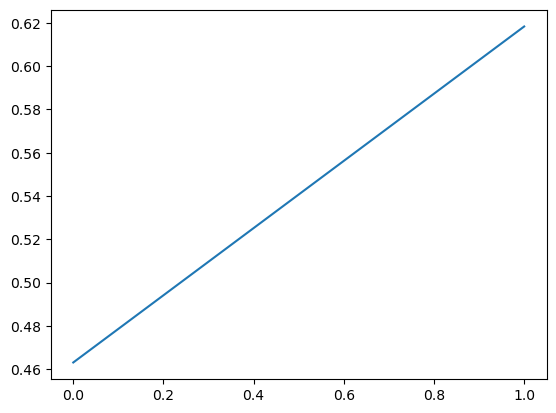

In [12]:
data = next(iter(train_loader))
data = torch.tensor(data).float().cuda()
print(data.size())
plt.figure()
plt.plot(data[0,:,0].cpu())


out,hiddens = model(data)
hidden = hiddens.detach().cpu().numpy().squeeze()
print(out.shape, hidden.shape)
plt.plot(out.detach().cpu().numpy()[0,:,0])

#run pca on the hidden states
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(hidden)
hidden_pca = pca.transform(hidden)
plt.figure()
plt.plot(hidden_pca[:,0],hidden_pca[:,1],label="reconstructed w PCA")
# plt.plot(sol[:,0],sol[:,1],label="original")
plt.figure()
#plot evr
plt.plot(np.cumsum(pca.explained_variance_ratio_))